In [2]:
##################################
#  独自ライブラリー： mshow
# (複数に対応したノートブック上画像表示)
##################################
import cv2;import numpy as np;import matplotlib as mpl;import matplotlib.pyplot as plt
%matplotlib inline
def mshow(img1, img2=None, img3=None, img4=None, img5=None):

    imgs = list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5])) 
    
    
    if len(imgs) == 1:
        # 一枚のとき
        imgs[0] = imgs[0].astype(np.uint8)
        im4p = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
        plt.imshow(im4p)

    else:
        # 複数枚のとき。横に並べていく
        plt.figure(figsize=(len(imgs)*4, len(imgs)*4))
        fig_exh_base = 100+len(imgs)*10
        for idx, tmp_img in enumerate(imgs):
            tmp_img = tmp_img.astype(np.uint8)
            tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(fig_exh_base+idx+1)
            plt.imshow(tmp_im4p)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 追記
import json
import datetime
import math

# debug
%pdb on

import pixiedust #%pixie_debugger


Automatic pdb calling has been turned ON
Pixiedust database opened successfully


In [4]:
import os
print(os.path. exists("sample/3-8/test.png"))

True


In [5]:
# !jt -t monokai -N -ofs 7 -f inconsolata -tfs 4 -cellw 90%

In [6]:
!wget https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml

--2020-06-30 03:21:49--  https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246945 (241K) [text/plain]
Saving to: ‘lbpcascade_animeface.xml.3’

lbpcascade_animefac 100%[===================>] 241.16K  --.-KB/s    in 0.02s   

2020-06-30 03:21:49 (12.3 MB/s) - ‘lbpcascade_animeface.xml.3’ saved [246945/246945]



In [7]:
# import shutil
# shutil.move("lbpcascade_animeface","lbpcascade_animeface.xml")


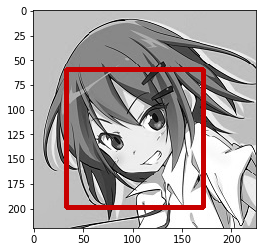

In [8]:
import cv2
import os

# print(os.path. exists("sample/3-8/test.png"))

def main():
    img = cv2.imread("sample/3-8/test.png")
    cascade = cv2.CascadeClassifier("lbpcascade_animeface.xml")
    
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face = cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors=3, minSize=(30, 30))

    for (x, y, w, h) in face:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,200), 3)
    
    mshow(img)
#     plt.imshow(img)
main()
# hog = cv2.HOGDescriptor()

In [50]:
# %cd sample/3-8/

In [51]:
# %cd /home/input/matsu_lab/gazoshori_algorism

In [52]:
# !wget https://i.pinimg.com/736x/79/99/f5/7999f56819c0713a02d7dbde2f03f59d.jpg

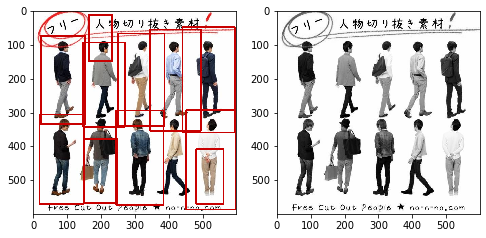

In [53]:
import cv2

def main():
    
    img = cv2.imread("sample/3-8/7999f56819c0713a02d7dbde2f03f59d.jpg")
   
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    hog = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # HoG特徴量
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    hogParams = {"winStride": (8,8), "padding":(32, 32), "scale": 1.05}
    
    human, r = hog.detectMultiScale(gray, **hogParams)
   
    for (x, y, w, h) in human :
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,200), 3)

    mshow(img,gray)
    
main()